## SVC iris classification
---

#### SVM으로 하는 분류(classification)라는 의미에서 SVC
#### https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [1]:
import my_utils as my

#### 데이터 준비

In [2]:
x_train, x_test, y_train, y_test = my.get_iris(mode="bin")
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(80, 4) (20, 4)
(80,) (20,)


#### 정규화
- 표준화(StandardScaler)
- 최소-최대 정규화(MinMaxScaler)

In [3]:
from sklearn.preprocessing import MinMaxScaler   # 최소-최대 정규화

scaler = MinMaxScaler()

scaler.fit(x_train)
x_train = scaler.transform(x_train)   # DataFrame에서 Numpy로 타입이 변경됨

In [4]:
x_train[:3]

array([[0.14814815, 0.5       , 0.07317073, 0.05882353],
       [0.66666667, 0.33333333, 0.90243902, 0.64705882],
       [0.7037037 , 0.375     , 0.80487805, 0.70588235]])

In [5]:
y_train = y_train.values   # Numpy로 타입 변경시킴

#### 학습

In [5]:
from sklearn.svm import SVC

clf = SVC(random_state=1)
# clf = SVC(kernel="linear", random_state=1)
clf.fit(x_train, y_train)

SVC(random_state=1)

#### 평가

In [6]:
clf.score(x_train, y_train)

1.0

In [7]:
x_test = scaler.transform(x_test)
y_test = y_test.values
clf.score(x_test, y_test)

1.0

In [8]:
y_pred = clf.predict(x_test)

In [9]:
my.print_score(y_test, y_pred)

accuracy : 1.0
precision : 1.0
recall : 1.0


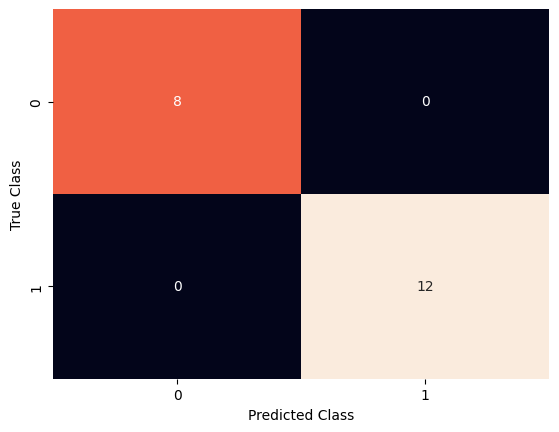

In [10]:
my.plpt_confusion_matrix(y_test, y_pred)

#### 속성 확인

In [17]:
## kernel이 linear일때만 확인 가능
# print(clf.coef_)
# print(clf.intercept_)

array([0.04814148])

## 다중 분류

#### 데이터 준비

In [2]:
x_train, x_test, y_train, y_test = my.get_iris()

#### 정규화

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)
x_train = scaler.transform(x_train)
y_train = y_train.values
x_test = scaler.transform(x_test)
y_test = y_test.values

#### 학습

In [4]:
from sklearn.svm import SVC

clf = SVC(random_state=1)
clf.fit(x_train, y_train)

SVC(random_state=1)

#### 평가

In [5]:
clf.score(x_train, y_train)

0.9666666666666667

In [6]:
clf.score(x_test, y_test)

0.9666666666666667

In [7]:
y_pred = clf.predict(x_test)
my.print_score(y_test, y_pred, average="macro")

accuracy : 0.9666666666666667
precision : 0.9523809523809524
recall : 0.9743589743589745


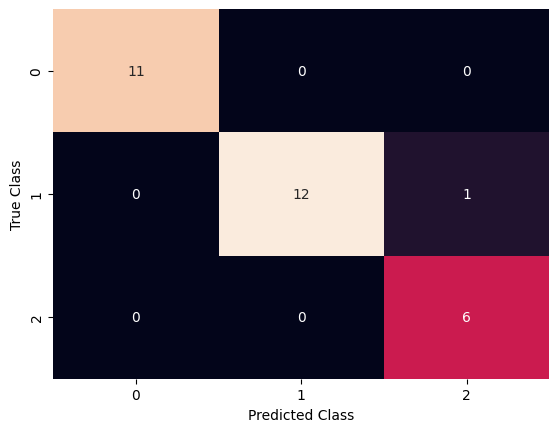

In [8]:
my.plpt_confusion_matrix(y_test, y_pred)

## 베스트 모델 찾기

In [9]:
x_train, x_test, y_train, y_test = my.get_iris()

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)
x_train = scaler.transform(x_train)
y_train = y_train.values
x_test = scaler.transform(x_test)
y_test = y_test.values

#### 모델 찾기

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

# 모델 여러개 만들고 테스트
names = ["linear", "linearSVC", "poly", "rbf", "knn-5"]
scores = {}
models = [SVC(kernel="linear", C=1), LinearSVC(C=1, max_iter=1000), SVC(kernel="poly", degree=3), SVC(kernel="rbf", C=1, gamma=0.7),
          KNeighborsClassifier(n_neighbors=5)]

for name, model in zip(names, models):
    model.fit(x_train, y_train)
    tmp = model.score(x_train, y_train)
    print(name, ":", tmp)
    scores[name] = tmp

linear : 0.95
linearSVC : 0.9333333333333333
poly : 0.9833333333333333
rbf : 0.9583333333333334
knn-5 : 0.95


In [16]:
scores

{'linear': 0.95,
 'linearSVC': 0.9333333333333333,
 'poly': 0.9833333333333333,
 'rbf': 0.9583333333333334,
 'knn-5': 0.95}

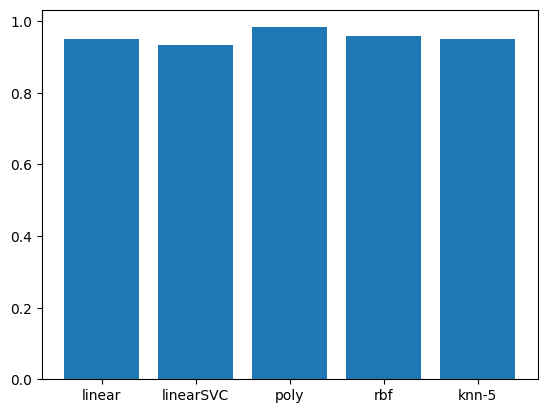

In [18]:
import matplotlib.pyplot as plt

plt.bar(names, scores.values())
plt.show()

## GridSearch

In [19]:
type(x_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [20]:
param_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
params = [
    {
        "C": param_range,
        "gamma": param_range,
        "kernel": ["rbf"]
    },
    {
        "C": param_range,
        "kernel": ["linear"]
    },
    {
        "C": param_range,
        "kernel": ["poly"],
        "degree": [2, 3]
    }
]

In [21]:
from sklearn.model_selection import GridSearchCV

clf = SVC(random_state=1)
gs = GridSearchCV(estimator=clf, param_grid=params, scoring="accuracy", cv=3, n_jobs=-1, verbose=3)
gs.fit(x_train, y_train)

Fitting 3 folds for each of 70 candidates, totalling 210 fits


GridSearchCV(cv=3, estimator=SVC(random_state=1), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 100],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 100],
                          'kernel': ['linear']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 100],
                          'degree': [2, 3], 'kernel': ['poly']}],
             scoring='accuracy', verbose=3)

In [23]:
gs.best_estimator_

SVC(C=10, kernel='linear', random_state=1)

In [24]:
gs.best_score_

0.975

In [25]:
gs.best_params_

{'C': 10, 'kernel': 'linear'}

#### 재학습

In [27]:
clf = gs.best_estimator_
clf.fit(x_train, y_train)

SVC(C=10, kernel='linear', random_state=1)

In [29]:
clf.score(x_train, y_train)

0.975

In [30]:
clf.score(x_test, y_test)

0.9666666666666667

## RandomizedSearachCV